# Physics 453 - Probability and Python Practice

Quantum mechanics is all about $\bf{probabilities}$.  In this class, we'll spend a lot of time learning that we usually cannot predict the exact values of a quantum particle's energy, momentum, position, etc. like we can in classical physics.  Instead, we'll obtain probability distributions (discrete or continuous) for these $\bf{observables}$, so it's important to understand some basics about probability theory.  In this notebook, we'll review how to calculate and understand the $\bf{mean}$, $\bf{variance}$, and $\bf{standard\ deviation}$ of a set of data, as well as work with $\bf{probability\ distributions}$.

This class will also involve computational assignments to help calculate and visualize quantum problems that just aren't feasible to solve with pencil and paper.  This Jupyter notebook is designed to touch on many of the programming concepts you'll need to understand in Python - variables, arrays, loops, plotting, and functions.

## Setup: Approximating $\pi$

The arena in which we'll review probability and Python is a very simple example of using random numbers to calculate something useful (also known as a Monte Carlo algorithm). 

Suppose you were trapped on a desert island and wanted to calculate the value of $\pi$ because you are constructing a circular hut for shelter (or you are just very bored) .  You might remember the first few digits of $\pi$, but you want a way to calculate it to higher accuracy using just the tools available on the island (sticks, rocks, certainly no calculators). There are actually tons of ways of doing this theoretically, but you want something really simple that will also help pass the time.

Here's one way to do this.  Draw a square in the sand with sides of length $L$ and inscribe a circle in square, so that the circle has a radius of $r=L/2$.  Now, throw rocks into the square, and record whether or not they also land inside the circle.  Suppose you throw $N$ rocks, and $m$ of them land inside the circle.  If the rocks are equally likely to land anywhere in the square, then the ratio of $m$ to $N$ is approximately equal to the ratio of the areas of the circle and the square.

$$\frac{m}{N}\approx \frac{\pi r^2}{L^2}=\frac{\pi}{4}$$

Or

$$\pi \approx \frac{4m}{N}$$

We expect that as we throw more and more rocks, this approximation should get better and better.  In the limit that we throw an infinite number of rocks, we should recover $\pi$ exactly.

## Numerical Experiment

We don't have to travel to a beach to do this experiment, since we can simulate it on a computer.  Here's some code that draws a square and circle to start you off.  We'll take $L=1$. First we import the libraries that we'll need - NumPy for math, and MatPlotLib for plotting.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Then, we can make a simple plot that just shows our square with the inscribed circle. Note that plotting code often looks confusing, so don't worry if it isn't obvious what this code is doing - ask questions!

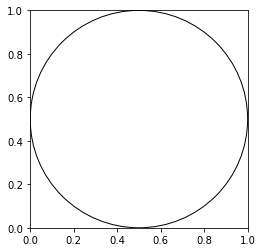

In [4]:
plt.figure(figsize=(4,4))   #Create a new plot, with a size of 4x4
ax = plt.gca()              #Get the axes of the current figure
ax.add_artist(plt.Circle((0.5,0.5),0.5,fill=False))   #Use a special Matplotlib function to draw a circle, centered at (0.5,0.5) with radius 0.5
plt.xlim([0,1])             #Make our plot look nice by limiting the axes to 0 to 1
plt.ylim([0,1])
ax.set_aspect('equal')      #Make sure the aspect ratio is even
plt.show()                  #Actually show us the plot

### Question 1

In the code cell below, pick $N=1000$ random points in the square. (The [np.random.random(N)](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.random.html#numpy.random.random) function would be useful.)  For each point, calculate how far away it is from the center of the circle.  Using this information, obtain an estimate of the value of $\pi$ with the method described above.  Print out the estimated value, and also make a plot that shows the square, circle, and your random points.

pi ~  3.188


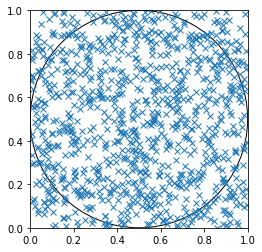

In [15]:
N=1000
rand_x = np.random.random(N)
rand_y = np.random.random(N)
r = np.sqrt((rand_x-0.5)**2+(rand_y-0.5)**2)
count = np.sum(r<0.5)
print("pi ~ ",4*count/N)

plt.figure(figsize=(4,4))
ax = plt.gca()
ax.add_artist(plt.Circle((0.5,0.5),0.5,fill=False))
plt.plot(rand_x,rand_y,'x')
plt.xlim([0,1])
plt.ylim([0,1])
ax.set_aspect('equal')
plt.show()

### Question 2

Now write a function that takes $N$ (the number of random points chosen) as an argument and returns an approximation of $\pi$ with the above method.  By turning the code from Question 1 into a function, we'll be able to easily call it repeatedly and with different values of $N$.  Call your function with $N=10000$ and print out the result.

In [16]:
def estimate_pi(samples):
    rand_x = np.random.random(N)
    rand_y = np.random.random(N)
    r = np.sqrt((rand_x-0.5)**2+(rand_y-0.5)**2)
    count = np.sum(r<0.5)
    return 4*count/N

print("pi ~ ",estimate_pi(10000))

pi ~  3.1


### Question 3

By now you've probably noticed that this method of calculating $\pi$ is not very accurate. One way we can get a better answer is by repeatedly approximating $\pi$ with $N$ samples.  If we collect $m$ results, we can take their average and use that for our approximation of $\pi$.

Write a function that takes two arguments, $m$ and $N$, and returns an array containin the $m$ approximations of $\pi$. Call your function with $m=10$ and $N=1000$, and print out the array of results.

In [17]:
def get_estimates(num_estimates, num_samples):
    estimates = np.zeros(num_estimates)
    for i in range(0, num_estimates):
        estimates[i]= estimate_pi(num_samples)
    return estimates

print(get_estimates(10,1000))

[ 3.172  3.124  3.16   3.204  3.112  3.096  3.152  3.124  3.168  3.14 ]


### Question 4

For a given $N$, we can now easily obtain $m$ approximations of $\pi$, the results of repeatedly running our square and circle algorithm. Looking at some statistical properties of these results will help us understand how our method of calculating $\pi$ behaves, and also give us some practice in calculating means, variances, and standard deviations, all of which are very important in quantum mechanics.

Given a set of data $x_i=[x_0,x_1,...,x_{N-1}]$, the mean, $\mu$, the variance, $\sigma^2$, and the standard deviation, $\sigma$ are given by:

$$\mu=\frac{1}{N}\sum_i x_i$$
$$\sigma^2=\frac{1}{N}\sum_i (x_i-\mu)^2$$

Write two functions that take an array of data as inputs, and that return the mean and variance as results.  Use the function from Question 3 to get a set of results for $m=10$ and $N=1000$, and use your functions to calculate its mean and variance.

In [18]:
def my_ave(data):
    return np.sum(data)/len(data)

def my_var(data):
    ave = my_ave(data)
    return np.sum((data-ave)**2)/len(data)

estimates = get_estimates(10, 1000)
print("Average=",my_ave(estimates))
print("Variance=",my_var(estimates))

Average= 3.1148
Variance= 0.00379536


### Question 5

As $N$ goes to infinity, our approximation of $\pi$ should become exact.  This is equivalent to saying that the variance of the results should go to zero.  In equations, we might guess that the variance and standard deviation should go like
$$\sigma^2 \approx \frac{1}{N^a}$$
$$\sigma \approx \frac{1}{N^{a/2}}$$
for some value of $a$.  Make plot of the log of the variance as a function of the log of $N$, for $N=100,1000,10000$ with $m=100$.  Based on this plot, what is the value of $a$ for our algorithm?  If I wanted to reduce the standard deviation, $\sigma$, by a factor of two, how much do I have to increase $N$?

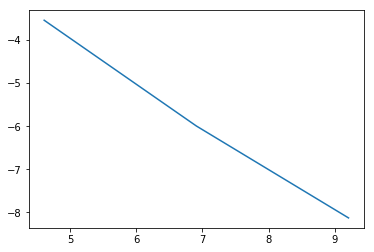

In [19]:
samples = [100,1000,10000]
variances = []
for N in samples:
    estimates = get_estimates(100, N)
    variances.append(np.var(estimates))

plt.figure()
plt.plot(np.log(samples), np.log(variances))
plt.show()

The slope of this curve is -1, so the value of $a$ is $a=1$.  That means the the standard deviation goes like $\sigma \approx \frac{1}{\sqrt{N}}$, so in order to cut $\sigma$ by a factor of 2 we need to increase $N$ by a factor of 4.  This is not very favorable behavior, since it means that it is hard to get a more accurate value of $\pi$ with this method.

### Question 6

The below will make a histogram of the $m$ approximations of $\pi$ obtained for various values of $N$.  You should only need to change one line to get the histogram, so that it acquires the data from your function that returns $m$ approximations of $\pi$ obtained with $N$ samples each.  Use $m=1000$.

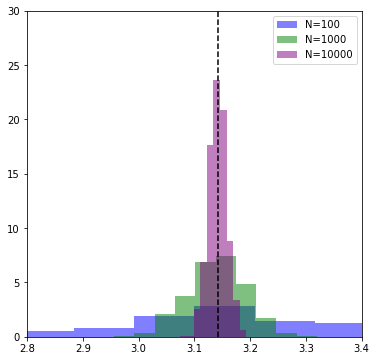

In [20]:
plt.figure(figsize=(6,6))
samples = [100,1000,10000]
variances = []
colors = ['blue','green','purple']
for i in range(0,len(samples)):
    N=samples[i]
    color=colors[i]
    estimates = get_estimates(1000, N)#This is the line you need to change!!
    n, bins, patches = plt.hist(estimates, bins=10, normed=1, alpha=0.5, label="N="+str(N),color=color)
plt.plot([np.pi,np.pi],[0,30],'--',color='black')
plt.xlim([2.8,3.4])
plt.ylim([0,30])
plt.legend()
plt.show()

### Question 7

According to the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), the distribution of our approximations to $\pi$ should tend towards a normal distribution as $m$ increases.  That means that our histograms should roughly look like gaussian probability distributions.
$$P(x)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-(x-\mu)^2/2\sigma^2}$$
This distribution is normalized so that $\int_{-\infty}^{\infty} P(x)dx=1$.

Repeat the plot you made in Question 6, but add the apprpriate Gaussian probability distribution curve for each value of $N$. Also add vertical lines for each value of $N$ that mark the positions $x_L=\mu-\sigma$ and $x_H=\mu+\sigma$.  In the limit of $m$ goes to infinity, what is the probability of getting an approximation of $\pi$ that is between $x_L$ and $x_H$? (You might want to look at the Wiki page for [normal distributions](https://en.wikipedia.org/wiki/Normal_distribution), under the standard deviation section.)

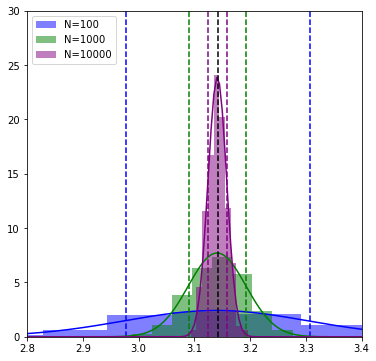

In [21]:
plt.figure(figsize=(6,6))

x = np.arange(2.6, 3.6, 0.005)
samples = [100,1000,10000]
variances = []
colors = ['blue','green','purple']
for i in range(0,len(samples)):
    N=samples[i]
    color=colors[i]
    estimates = get_estimates(1000, N)
    n, bins, patches = plt.hist(estimates, bins=10, normed=1, alpha=0.5, label="N="+str(N),color=color)
    var=my_var(estimates)
    stddev=np.sqrt(var)
    plt.plot([np.pi+stddev,np.pi+stddev],[0,30],'--',color=color)
    plt.plot([np.pi-stddev,np.pi-stddev],[0,30],'--',color=color)
    plt.plot(x, (1./np.sqrt(2*np.pi*my_var(estimates)))*np.exp(-(x-my_ave(estimates))**2/(2*my_var(estimates))),color=color)
plt.plot([np.pi,np.pi],[0,30],'--',color='black')
plt.xlim([2.8,3.4])
plt.ylim([0,30])
plt.legend()
plt.show()

For a normal distribution, the probability of getting a value within one standard deviation of the mean is about 68%.